In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# importing dataset no: 1 (total consumtion in litres)

total_consumption= pd.read_csv("C:/Users/Lithium/Downloads/Alcohol_study/total-alcohol-consumption-per-capita-litres-of-pure-alcohol.csv")
total_consumption.rename(columns={total_consumption.columns[3]: "total consumption(liters)"}, inplace=True)
total_consumption.tail(5)


,Entity,Code,Year,total consumption(liters)
996,Zimbabwe,ZWE,2000,3.02610
997,Zimbabwe,ZWE,2005,2.74545
998,Zimbabwe,ZWE,2010,3.31307
999,Zimbabwe,ZWE,2015,3.74794
1000,Zimbabwe,ZWE,2019,3.62809


In [4]:
# lets find out different nations (Entity) in the dataset
total_consumption['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'East Asia and Pacific (WB)',
       'East Timor', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Europe and Central Asia (WB)', 'European Union (27)', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'G

In [5]:
# Removing groups as we intend to conduct nation-wise study
 
groups_to_remove= ['European Union (27)','High-income countries','Low-income countries',
                  'Lower-middle-income countries','Middle-income countries','Upper-middle-income countries',
                  'World']
filtered_df1 = total_consumption[~total_consumption['Entity'].str.contains(r'\(WB\)', regex=True) &
                                ~total_consumption['Entity'].isin(groups_to_remove)]

In [6]:
# Keeping these years as they are common across all datasets inspected

years_to_keep = [2000, 2005, 2010, 2015, 2019]

# Filter the DataFrame for the specified years
filtered_years1 = filtered_df1[filtered_df1['Year'].isin(years_to_keep)]

filtered_years1.sample(5) # its good to use sample sometimes, instead of head()

,Entity,Code,Year,total consumption(liters)
114,Botswana,BWA,2019,8.16316
358,Grenada,GRD,2015,7.76515
651,Nicaragua,NIC,2015,4.11369
606,Montenegro,MNE,2015,9.55367
724,Portugal,PRT,2005,12.17916


In [7]:
#importing dataset number 2 (alcohol consumption as per person and corresponding income per person )

income_wise=pd.read_csv("C:/Users/Lithium/Downloads/Alcohol_study/alcohol-consumption-vs-gdp-per-capita.csv")

income_wise= income_wise.drop(columns=[income_wise.columns[5]])

# renaming columns 
income_wise.rename(columns={income_wise.columns[3]:"consumtion per capita" , income_wise.columns[4]:"GDP per capita"}, inplace=True)

#filtering years
filtered_years2 = income_wise[income_wise['Year'].isin(years_to_keep)]
filtered_years2.head(5)

,Entity,Code,Year,consumtion per capita,GDP per capita
0,Abkhazia,OWID_ABK,2015,NaN,NaN
1,Afghanistan,AFG,2000,0.00277,NaN
2,Afghanistan,AFG,2005,0.02684,1352.3207
3,Afghanistan,AFG,2010,0.01241,2026.1638
4,Afghanistan,AFG,2015,0.00874,2108.7140


In [8]:
#importing dataset no:3 (gender wise alcohol consumption)
    
gender_wise = pd.read_csv("C:/Users/Lithium/Downloads/Alcohol_study/alcohol-consumption-per-capita-men-women.csv")
gender_wise.head()

,Entity,Code,Year,3.5.2 - Alcohol consumption per capita (aged 15 years and older) within a calendar year (litres of pure alcohol) - SH_ALC_CONSPT - Male,3.5.2 - Alcohol consumption per capita (aged 15 years and older) within a calendar year (litres of pure alcohol) - SH_ALC_CONSPT - Female,Population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2000,0.00,0.00,19542986.0,NaN
2,Afghanistan,AFG,2005,0.05,0.01,24411196.0,NaN
3,Afghanistan,AFG,2010,0.02,0.00,28189672.0,NaN
4,Afghanistan,AFG,2015,0.02,0.00,33753500.0,Asia


In [9]:
# Rename the 4th and 5th columns for better readability
gender_wise.rename(columns={gender_wise.columns[3]: 'male_consumption', gender_wise.columns[4]: 'female_consumption'}, inplace=True)

# Drop the 6th and 7th columns , not required in our study
gender_wise = gender_wise.drop(columns=[gender_wise.columns[5], gender_wise.columns[6]])

# Filter the DataFrame for the specified years
filtered_years3 = gender_wise[gender_wise['Year'].isin(years_to_keep)]
filtered_years3.head()

,Entity,Code,Year,male_consumption,female_consumption
0,Abkhazia,OWID_ABK,2015,NaN,NaN
1,Afghanistan,AFG,2000,0.00,0.00
2,Afghanistan,AFG,2005,0.05,0.01
3,Afghanistan,AFG,2010,0.02,0.00
4,Afghanistan,AFG,2015,0.02,0.00


In [10]:
#importing dataset number 4 ( deaths due to alcohol consumptions)

death_rate= pd.read_csv("C:/Users/Lithium/Downloads/Alcohol_study/rate-of-premature-deaths-due-to-alcohol.csv")
death_rate.rename(columns={death_rate.columns[3]: 'death per million'}, inplace=True)
filtered_years4 = death_rate[death_rate['Year'].isin(years_to_keep)]
filtered_years4.head()

,Entity,Code,Year,death per million
10,Afghanistan,AFG,2000,4.987489
15,Afghanistan,AFG,2005,4.588114
20,Afghanistan,AFG,2010,4.296111
25,Afghanistan,AFG,2015,3.898268
29,Afghanistan,AFG,2019,3.829584


In [11]:
print(filtered_years1.shape)
print(filtered_years2.shape)
print(filtered_years3.shape)
print(filtered_years4.shape)


(931, 4)
(1150, 5)
(1369, 5)
(1140, 4)


As observed, the shapes of the datasets are different. We need to apply preprocessing steps so that all datasets align properly and can be merged together.

Therefore we will filter out all dataframes according to the unique values of  "Codes" present in the first dataframe (filtered_years1) to ensure proper alignment andsimplify the process of merging.


In [12]:

# Extract unique "Code" values from filtered_years1
reference_codes = set(filtered_years1['Code'].unique())

# Filter each DataFrame to include only rows with codes present in reference_codes
filtered_years2_aligned = filtered_years2[filtered_years2['Code'].isin(reference_codes)]
filtered_years3_aligned = filtered_years3[filtered_years3['Code'].isin(reference_codes)]
filtered_years4_aligned = filtered_years4[filtered_years4['Code'].isin(reference_codes)]

# Display shapes of the new filtered DataFrames
print("Refrence Df :",filtered_years1.shape)
print(filtered_years2_aligned.shape)
print(filtered_years3_aligned.shape)
print(filtered_years4_aligned.shape)

Refrence Df : (931, 4)
(935, 5)
(935, 5)
(935, 4)


Datasets are almost has same shape , however still we cann see 4 rows extra in dataframe 1.

so We first calculate how many rows each entity has in both filtered_years1 and filtered_years2_aligned(as a test). We then merge these two DataFrames on the 'Entity' column. The merge operation is done using how='outer'.
We filter the merged DataFrame to include only the entities where the counts in Count_Years1 and Count_Years2 are different.

This is just to find out extra rows, once done, we will apply this to all dataframes.

In [13]:
# We are comparing 1 with 2, you can compare 1 with 3 or 1 with 4 df.

# Count the number of rows for each entity in both DataFrames
entity_counts_1 = filtered_years1['Entity'].value_counts().reset_index()
entity_counts_1.columns = ['Entity', 'Count_Years1']

entity_counts_2 = filtered_years2_aligned['Entity'].value_counts().reset_index()
entity_counts_2.columns = ['Entity', 'Count_Years2']

# Merge these counts to find mismatched entities
merged_counts = entity_counts_1.merge(entity_counts_2, on='Entity', how='outer', suffixes=('_Years1', '_Years2'))
merged_counts = merged_counts.fillna(0)  # Fill NaN values with 0 for entities not present in one of the DataFrames

# Identify mismatched entities
mismatched_entities = merged_counts[merged_counts['Count_Years1'] != merged_counts['Count_Years2']]

print("Entities with mismatched row counts:")
print(mismatched_entities)




Entities with mismatched row counts:
         Entity  Count_Years1  Count_Years2
185      Serbia             3             5
186  Montenegro             3             5


Okay, so we came to know, these two nations are creating mismatch
so we will remove these from all dataframes


In [14]:
# List of entities to remove
entities_to_remove = ['Serbia', 'Montenegro']

# Remove rows where Entity is in entities_to_remove from all DataFrames
filtered_years1 = filtered_years1[~filtered_years1['Entity'].isin(entities_to_remove)]
filtered_years2_aligned = filtered_years2_aligned[~filtered_years2_aligned['Entity'].isin(entities_to_remove)]
filtered_years3_aligned = filtered_years3_aligned[~filtered_years3_aligned['Entity'].isin(entities_to_remove)]
filtered_years4_aligned = filtered_years4_aligned[~filtered_years4_aligned['Entity'].isin(entities_to_remove)]

# Display shapes of the new filtered DataFrames
print("Refrence Df :", filtered_years1.shape)
print(filtered_years2_aligned.shape)
print(filtered_years3_aligned.shape)
print(filtered_years4_aligned.shape)

Refrence Df : (925, 4)
(925, 5)
(925, 5)
(925, 4)


Finally , our dataframes are have equal rows , we can proceed with merging them.

There are many ways of merging we are applying concatination.We will reset the index for each dataframe, then select specific columns from the aligned dataframes, and finally concatenate these columns with the reference dataframe(filtered_years1) to create a merged dataframe.


In [15]:

#Merging dataframes

# List of DataFrames
dataframes = [filtered_years1, filtered_years2_aligned, filtered_years3_aligned, filtered_years4_aligned]

# Reset index for each DataFrame in the list
for df in dataframes:
    df.reset_index(drop=True, inplace=True)

# Selecting specific columns from filtered_years2_aligned to filtered_years4_aligned (4th and 5th columns)
# basically we are removing repeated columns like Entity, code , Year.

selected_columns = [
    filtered_years2_aligned.iloc[:, 3:5],  # Select 4th and 5th columns from filtered_years2_aligned
    filtered_years3_aligned.iloc[:, 3:4],  # Select 4th and 5th columns from filtered_years3_aligned
    filtered_years4_aligned.iloc[:, 3:5],  # Select 4th and 5th columns from filtered_years4_aligned
]

# Concatenate filtered_years1 with selected columns from filtered_years2_aligned to filtered_years4_aligned
merged_df = pd.concat([filtered_years1] + selected_columns, axis=1)

# Display the shape and first few rows of the merged DataFrame
print("Shape of merged DataFrame:", merged_df.shape)
print("\nFirst few rows of merged DataFrame:")
merged_df.head()


Shape of merged DataFrame: (925, 8)

First few rows of merged DataFrame:


,Entity,Code,Year,total consumption(liters),consumtion per capita,GDP per capita,male_consumption,death per million
0,Afghanistan,AFG,2000,0.00277,0.00277,NaN,0.00,4.987489
1,Afghanistan,AFG,2005,0.02684,0.02684,1352.3207,0.05,4.588114
2,Afghanistan,AFG,2010,0.01241,0.01241,2026.1638,0.02,4.296111
3,Afghanistan,AFG,2015,0.00874,0.00874,2108.7140,0.02,3.898268
4,Afghanistan,AFG,2019,0.01618,0.01618,2079.9219,0.03,3.829584


Lets do the first visualization with our curated dataframe and find out which are the top 10 countries that consume the most alcohol.



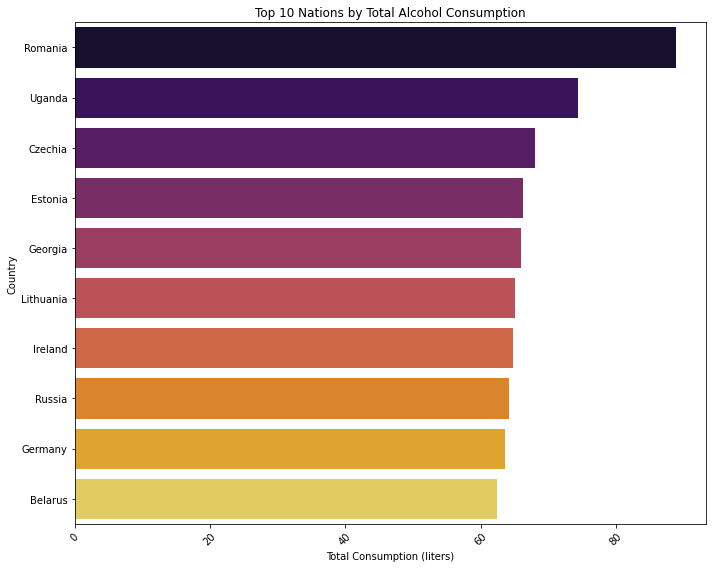

In [16]:
import seaborn as sns

# Aggregate total consumption across all years for each nation
total_consumption = merged_df.groupby('Entity')['total consumption(liters)'].sum()

# Sort nations by total consumption and select top 10
top_10_consumers = total_consumption.nlargest(10)

# Plotting the bar chart with Inferno palette
plt.figure(figsize=(10, 8))
sns.barplot(x=top_10_consumers.values, y=top_10_consumers.index, palette='inferno')
plt.title('Top 10 Nations by Total Alcohol Consumption')
plt.xlabel('Total Consumption (liters)')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Did you find your conutry here?

We will continue our analysis....